In [36]:
import historical_indices_kor
import historical_indices_overseas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
index_kor = 'KPI200'
index_overseas = 'US.SP500'

In [17]:
kospi200 = historical_indices_kor.historical_index_naver(index_kor, start_date='2008-01-01', end_date='2017-12-31')

In [18]:
sp500 = historical_indices_overseas.historical_index_daum(index_overseas, start_date='2008-01-01', end_date='2017-12-31')

In [19]:
tmp = {'S&P500': sp500, 'KOSPI200': kospi200}

In [21]:
df = pd.DataFrame(tmp)

In [22]:
df = df.fillna(method='ffill')

In [23]:
df= df.fillna(method='bfill')

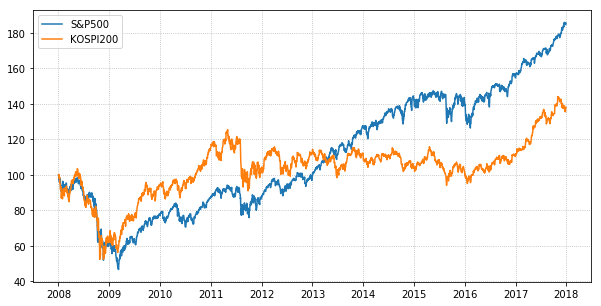

In [27]:
plt.figure(figsize=(10,5))
plt.plot(df['S&P500']/df['S&P500'].loc[dt.date(2008, 1, 2)]*100)
plt.plot(df['KOSPI200']/df['KOSPI200'].loc[dt.date(2008, 1, 2)]*100)
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':')

In [28]:
df_2016_now = df.loc[dt.date(2016, 1, 1):] / df.loc[dt.date(2016, 1, 4)] * 100

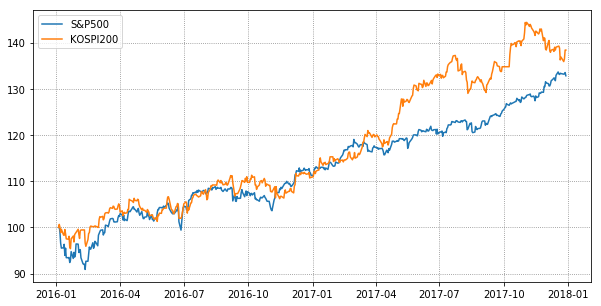

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df_2016_now['S&P500'])
plt.plot(df_2016_now['KOSPI200'])
plt.legend(loc=0)
plt.grid(True, color='0.5', linestyle=':')

Text(0, 0.5, 'KOSPI200')

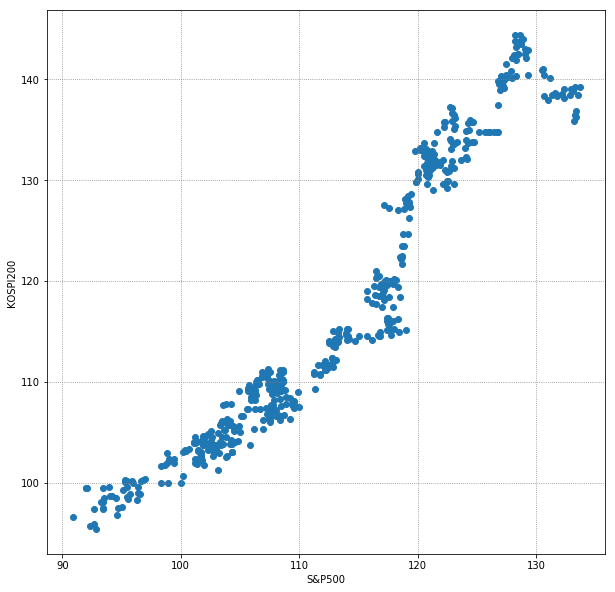

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(df_2016_now['S&P500'], df_2016_now['KOSPI200'])
plt.grid(True, color='0.5', linestyle=':')
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [38]:
x = df_2016_now['S&P500']
y = df_2016_now['KOSPI200']

In [39]:
independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

In [40]:
reg = LinearRegression()
reg.fit(independent_var, dependent_var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
result = {'Slope':reg.coef_[0,0], 'Intercept':reg.intercept_[0], 'R^2':reg.score(independent_var, dependent_var)}

In [42]:
result

{'Slope': 1.2879677718223626,
 'Intercept': -28.21072167458472,
 'R^2': 0.9210575482317962}

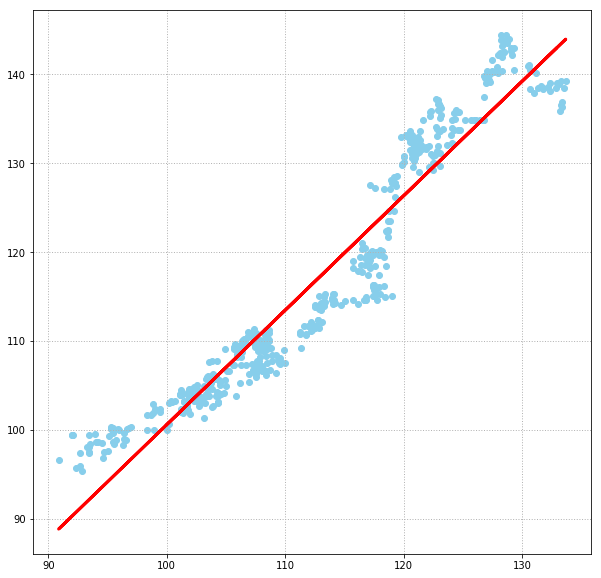

In [43]:
plt.figure(figsize=(10, 10))
plt.scatter(independent_var, dependent_var, color='skyblue')
plt.plot(independent_var, reg.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)